<a href="https://colab.research.google.com/github/Abhishek-Sharma-02/Stock-Price-Prediction/blob/main/Stock_price_prediction_Infy_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Import required package

import pandas as pd
import numpy as np

# To plot within notebok

import matplotlib.pyplot as plt
%matplotlib inline

# Setting figure size

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

# For normalising data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
# Read the file

df=pd.read_csv("/content/INFY NSQ.csv")

In [71]:
# Print the head()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.688857,4483200
1,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.000535,5856000
2,2001-01-04,3.193359,3.238281,3.031250,3.093750,1.913555,3811200
3,2001-01-05,3.148438,3.171875,2.937500,2.960938,1.831408,7414400
4,2001-01-08,2.953125,2.957031,2.767578,2.901855,1.794864,4326400


In [72]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5038,2021-01-12,18.920000,18.940001,18.540001,18.600000,18.600000,10629100
5039,2021-01-13,19.030001,19.070000,18.400000,18.430000,18.430000,18409900
5040,2021-01-14,18.570000,18.650000,18.139999,18.219999,18.219999,13286100
5041,2021-01-15,18.190001,18.379999,18.110001,18.170000,18.170000,7443000
5042,2021-01-19,18.080000,18.180000,17.950001,18.120001,18.120001,7177800


In [73]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03
mean,6.304855,6.372404,6.236890,6.306081,5.108656,1.229943e+07
std,2.915177,2.928047,2.902849,2.916358,3.002938,9.422713e+06
min,1.015937,1.070938,0.956250,1.031875,0.638959,3.360000e+05
25%,4.343750,4.395937,4.281562,4.339062,2.969807,6.634250e+06
50%,6.506250,6.575000,6.450000,6.511250,4.703772,1.009020e+07
75%,8.140000,8.200000,8.061250,8.133125,6.873258,1.529210e+07
max,19.030001,19.070000,18.549999,18.760000,18.760000,1.475912e+08


In [74]:
df.shape

(5043, 7)

In [75]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [76]:
df1 = df.dropna()
print(df1)

            Date       Open       High  ...      Close  Adj Close    Volume
0     2001-01-02   2.878906   2.914063  ...   2.730469   1.688857   4483200
1     2001-01-03   2.705078   3.406250  ...   3.234375   2.000535   5856000
2     2001-01-04   3.193359   3.238281  ...   3.093750   1.913555   3811200
3     2001-01-05   3.148438   3.171875  ...   2.960938   1.831408   7414400
4     2001-01-08   2.953125   2.957031  ...   2.901855   1.794864   4326400
...          ...        ...        ...  ...        ...        ...       ...
5038  2021-01-12  18.920000  18.940001  ...  18.600000  18.600000  10629100
5039  2021-01-13  19.030001  19.070000  ...  18.430000  18.430000  18409900
5040  2021-01-14  18.570000  18.650000  ...  18.219999  18.219999  13286100
5041  2021-01-15  18.190001  18.379999  ...  18.170000  18.170000   7443000
5042  2021-01-19  18.080000  18.180000  ...  18.120001  18.120001   7177800

[5043 rows x 7 columns]


In [77]:
df1.shape

(5043, 7)

There are multiple variables in the dataset – Date, Open, High, Low, Close, Adj Close and Volume.

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High and Low represent the maximum, minimum price of the share for the day.
Volume is the number of shares bought or sold in the day 


In [78]:
# Setting index as date

df1['Date']=pd.to_datetime(df1.Date,format='%Y-%m-%d')
df1.index = df1['Date']

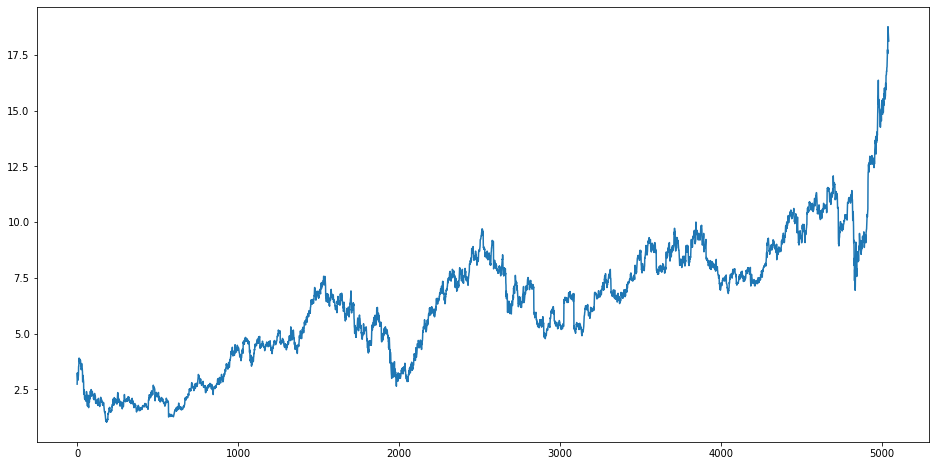

In [79]:
# PLot figure

plt.figure(figsize = (16,8))
plt.plot(df['Close'],label='Close Price History')

In [80]:
df1.head() # Query - Why getting dates twice
           # First date is index, second date is column data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2001-01-02,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.688857,4483200
2001-01-03,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.000535,5856000
2001-01-04,2001-01-04,3.193359,3.238281,3.031250,3.093750,1.913555,3811200
2001-01-05,2001-01-05,3.148438,3.171875,2.937500,2.960938,1.831408,7414400
2001-01-08,2001-01-08,2.953125,2.957031,2.767578,2.901855,1.794864,4326400


In [81]:
df1.shape

(5043, 7)

In [82]:
# Setting the Index as date
df1['Date'] = pd.to_datetime(df1.Date,format='%d-%m-%Y')
df1.index = df1['Date']

In [83]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2001-01-02,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.688857,4483200
2001-01-03,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.000535,5856000
2001-01-04,2001-01-04,3.193359,3.238281,3.031250,3.093750,1.913555,3811200
2001-01-05,2001-01-05,3.148438,3.171875,2.937500,2.960938,1.831408,7414400
2001-01-08,2001-01-08,2.953125,2.957031,2.767578,2.901855,1.794864,4326400


In [84]:
#creating dataframe with date and the target variable
data = df1.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])

In [85]:
for i in range(0,len(data)):
    new_data['Date'][i]= data['Date'][i]
    new_data['Close'][i]= data['Close'][i]

In [86]:
new_data.head()

,Date,Close
0,2001-01-02 00:00:00,2.73047
1,2001-01-03 00:00:00,3.23438
2,2001-01-04 00:00:00,3.09375
3,2001-01-05 00:00:00,2.96094
4,2001-01-08 00:00:00,2.90185


In [87]:
train_len = round(0.8 * new_data.shape[0])

In [88]:
# NOTE: While splitting the data into train and validation set,
#we cannot use random splitting since that will destroy the time component.
# So here we have set the 20% data into test and the 80% data into train set.

# splitting into train and test
train = new_data[:train_len]
test = new_data[train_len:]

In [89]:
#Shape of training set
print('\n Shape of training data')
print(train.shape)


 Shape of training data
(4034, 2)


In [90]:
# Shape of tets data
print('\n Shape of test data')
print(test.shape)


 Shape of test data
(1009, 2)


In [91]:
# # IN the next step we will be creating prediciton for the test set and check the RmSE using the actual values
# # making prediction
# preds =[]
# for i in range(0,test.shape[0]):
#     a=train['Close'][len(train)-1039+i:].sum()+sum(preds)
#     b=a/1039
#     preds.append
    

In [92]:
test_len = len(test)

In [93]:
# IN the next step we will be creating prediciton for the test set and check the RmSE using the actual values
# making prediction
preds =[]
for i in range(0,test.shape[0]):
    a=train['Close'][len(train)-test_len+i:].sum()+sum(preds)
    b=a/test_len
    preds.append(b) # (b) is missing in original work
print(preds)    

[7.621765361744309, 7.622885793222746, 7.624122548220985, 7.625319646881263, 7.626418823934664, 7.62750917955799, 7.628625392818205, 7.629617588450333, 7.630657843741166, 7.631695413457461, 7.632790998604594, 7.633857937156234, 7.634878856816448, 7.635914415643818, 7.63693861228965, 7.638076559378143, 7.639130153589617, 7.640148865337477, 7.641254067384392, 7.642336826618668, 7.64357799294832, 7.644767118808526, 7.645879375616067, 7.647060871528471, 7.648272031956149, 7.649379090461557, 7.650530605912956, 7.651773698683931, 7.652731849029505, 7.653554675440831, 7.654390705842657, 7.655218892865296, 7.656124709409265, 7.657026468288759, 7.657977436047221, 7.658858731821303, 7.6596653311590845, 7.660481401853989, 7.66125244387763, 7.662112208440442, 7.66316980230411, 7.664206145021954, 7.665203871627525, 7.66616170499881, 7.667166325122694, 7.668257421579703, 7.669238102869673, 7.670370895835847, 7.671484989885239, 7.6726100988940455, 7.673694202064405, 7.674766991164568, 7.6756946591439

In [94]:
#Checking the RmSE Values
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-preds),2)))
print('\n RmSE value on test data set: ')
print(rms)


 RmSE value on test data set: 
2.872984545788437


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



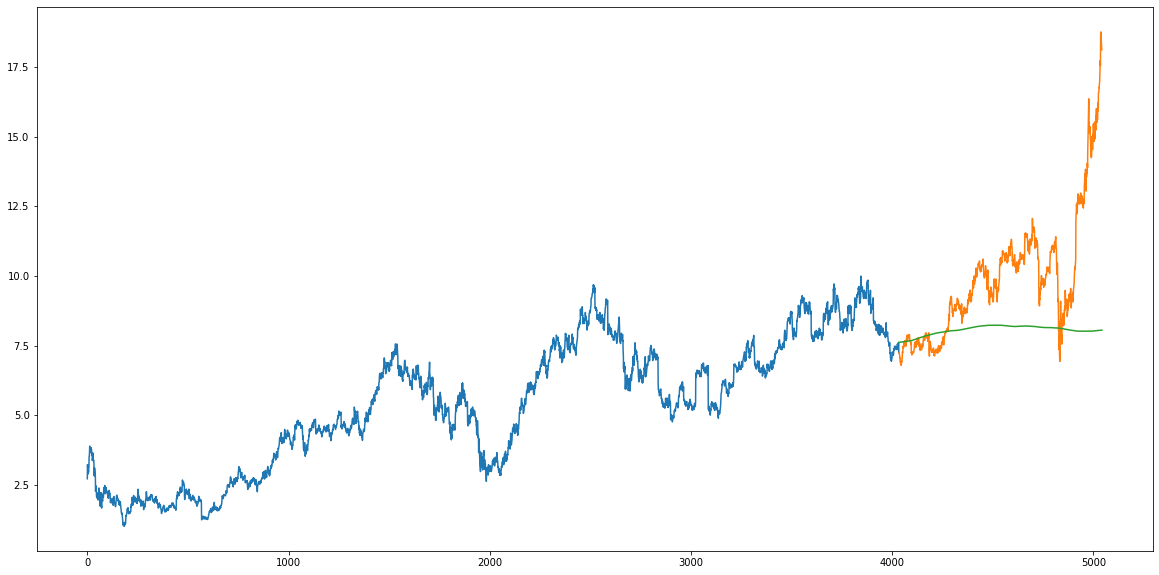

In [95]:
#plot
test['Predictions'] =0
test['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

The RMSE value is close to "  " but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

In the next section, we will look at two commonly used machine learning techniques – Linear Regression and kNN, and see how they perform on our stock market data.

In [124]:
# The most basic machine learning algorithm that can be implemented on this data is linear regression. 
#The linear regression model returns an equation that determines the relationship between the independent and the dependent variable.
#We do not have a set of independent variables. We have only the dates instead. 
#Let us use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.

#Implementation :We will first sort the dataset in ascending order and then create a separate dataset so that any new feature 
#created does not affect the original data.

#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [125]:
from fastai.tabular import *

In [126]:
#create features # Not running as unable to installl Fastai
#from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.6/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [127]:
# Substitue of above, but also getting error
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
# Substitue of above and fastai method
d = pd.date_range('2000-01-03', '2021-01-12', freq='D').to_series()
s = (d.dt.dayofweek==1) |(d.dt.dayofweek==4)
t = s.apply(lambda x: int(x==True))

In [129]:
new_data.isnull().sum()

Close               0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
mon_fri             0
dtype: int64

In [130]:
new_data = new_data.dropna()

In [131]:
new_data.isnull().sum()

Close               0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
mon_fri             0
dtype: int64

In [132]:
train_len = round(0.8 * new_data.shape[0])

In [133]:
#split into train and validation
train = new_data[:train_len]
test = new_data[train_len:]

In [134]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [135]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

1.9406666801451602

In [ ]:
#The RMSE value is near than the previous technique, which clearly shows that linear regression has performed as per expectation. 
#Let’s look at the plot and understand why linear regression has not done well

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



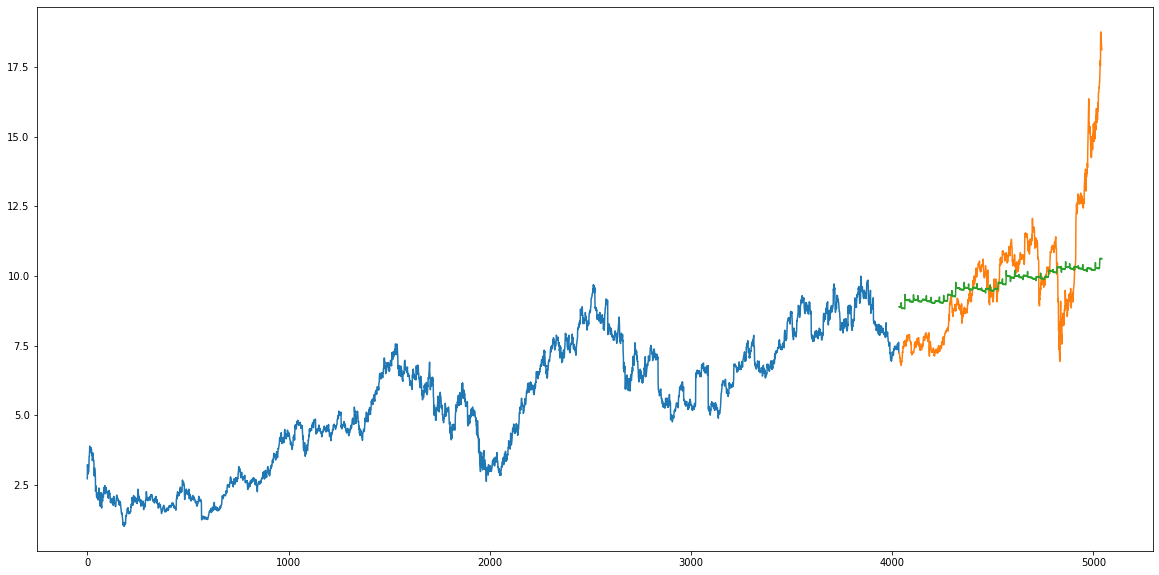

In [137]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

test.index = new_data[train_len:].index
train.index = new_data[:train_len].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])


In [138]:
print(preds)

[ 8.902005  8.904899  8.907792  8.896742 ... 10.631406 10.6343   10.62325  10.623246]


### KNN

In [139]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [140]:
x_valid = x_test
y_valid = y_test

In [141]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [143]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [144]:
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [145]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

5.427252109207298

In [146]:
valid = test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



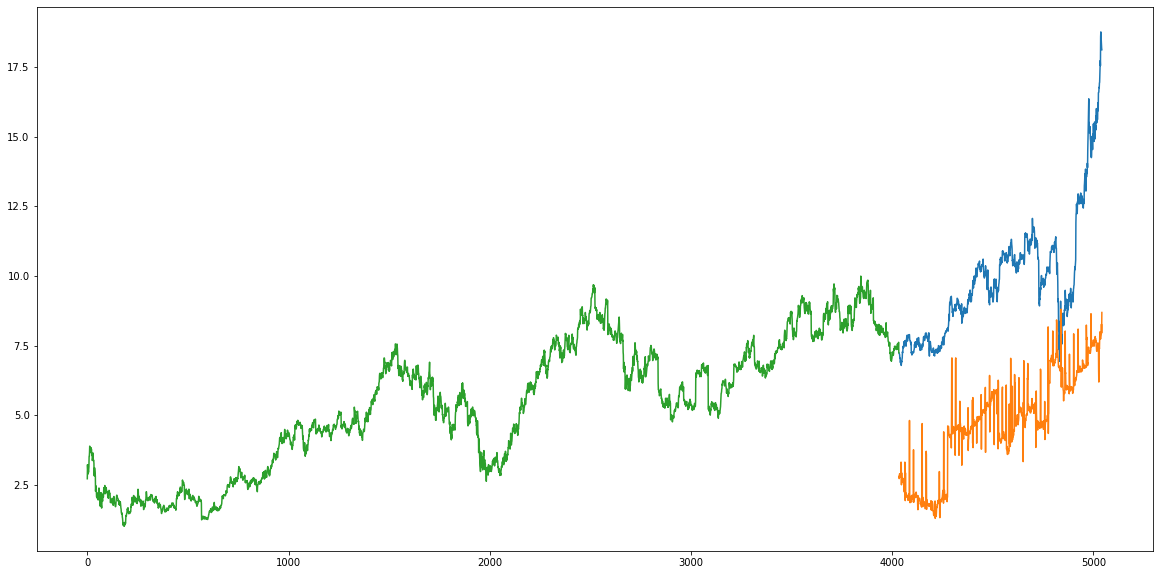

In [147]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(test[['Close', 'Predictions']])
plt.plot(train['Close'])

In [148]:
print(preds)

[2.8174609999999998 2.7353515 2.851133 2.9097265 ... 7.9125 8.275 7.955 8.695]


### Prophet

In [96]:
#importing prophet
from fbprophet import Prophet

In [98]:
# Read the file

df=pd.read_csv("/content/INFY NSQ.csv")

In [99]:
data = df.sort_index(ascending=True, axis=0)

In [100]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [101]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [102]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [103]:
new_data = new_data.dropna()

In [ ]:
train_len = round(0.8 * new_data.shape[0])

In [104]:
#train and validation
train = new_data[:train_len]
valid = new_data[train_len:]

In [106]:
valid.head()

,ds,y
Date,,
2017-01-17,2017-01-17,7.245
2017-01-18,2017-01-18,7.22
2017-01-19,2017-01-19,7.195
2017-01-20,2017-01-20,7.18
2017-01-23,2017-01-23,7.045


In [107]:
#fit the model
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [109]:
#rmse
forecast_valid = forecast['yhat'][train_len:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

1.8844396476432457

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



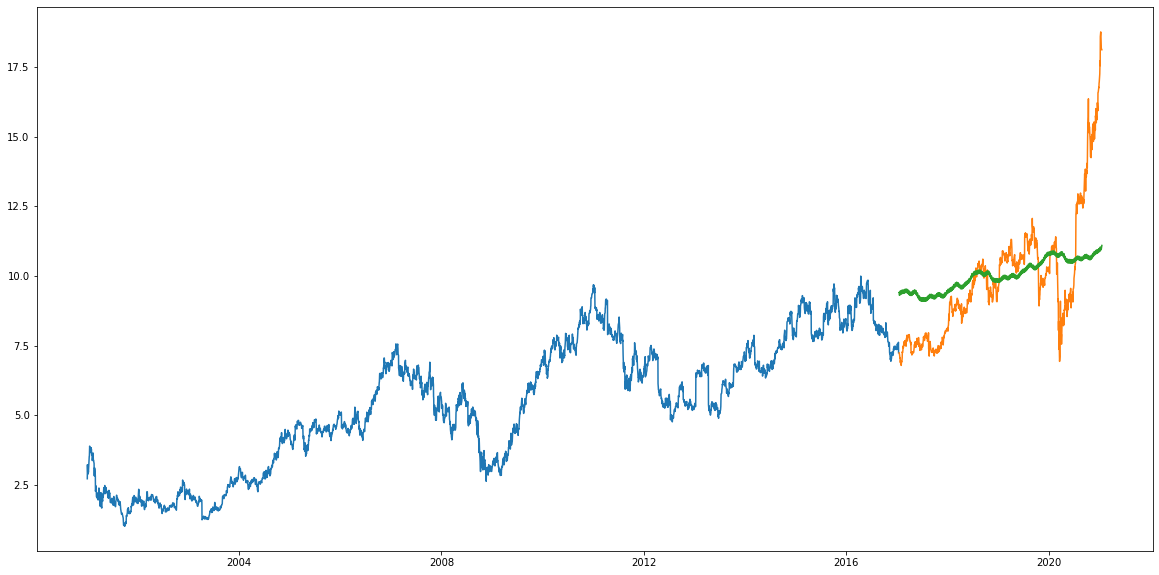

In [110]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])


In [112]:
print(forecast_valid.values)

[ 9.410915  9.421397  9.312329  9.322762 ... 10.954159 10.968137 10.968992 11.099298]


#Inference
#Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. 
#One problem in using regression algorithms is that the model overfits to the date and month column.
#Instead of taking into account the previous values from the point of prediction,
#the model will consider the value from the same date a month ago, or the same date/month a year ago.
